# Tensorflow Image Classification Model for Landmark Recognition

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

# Define the path to the folder you want to change to
folder_path = '/content/drive/MyDrive/udacity/M_L_foundamentals/project-3'

# Change the directory
os.chdir(folder_path)

# Check the current directory
print(os.getcwd())

/content/drive/MyDrive/udacity/M_L_foundamentals/project-3


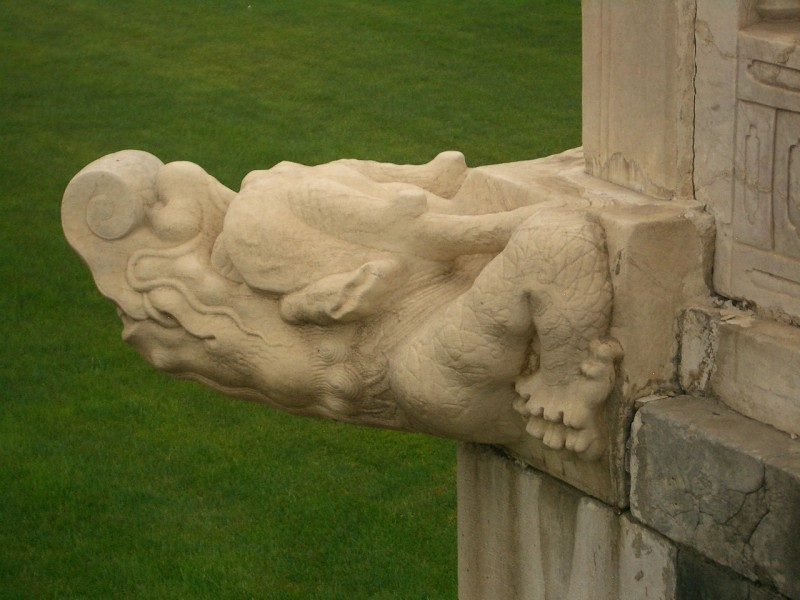

In [ ]:
path = './landmark_images/train/45.Temple_of_Heaven'
name = '1002261bca5e54cb.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [ ]:
img = load_img(fullname, target_size=(299, 299))

In [ ]:
x = np.array(img)
x.shape

(299, 299, 3)

In [ ]:
!nvidia-smi

Wed Jan 24 15:14:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Pre-trained convolutional neural networks


In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 0s 0us/step


In [ ]:
X = np.array([x])

In [ ]:
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

1/1 [==============================] - 3s 3s/step


In [ ]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n03903868', 'pedestal', 0.61985373),
  ('n03837869', 'obelisk', 0.04489157),
  ('n01704323', 'triceratops', 0.028188217),
  ('n02892201', 'brass', 0.023539977),
  ('n04355338', 'sundial', 0.019231403)]]

## Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './landmark_images/train',
    target_size=(150, 150),
    batch_size=64
)

Found 4996 images belonging to 50 classes.


In [ ]:
train_ds.class_indices

{'00.Haleakala_National_Park': 0,
 '01.Mount_Rainier_National_Park': 1,
 '02.Ljubljana_Castle': 2,
 '03.Dead_Sea': 3,
 '04.Wroclaws_Dwarves': 4,
 '05.London_Olympic_Stadium': 5,
 '06.Niagara_Falls': 6,
 '07.Stonehenge': 7,
 '08.Grand_Canyon': 8,
 '09.Golden_Gate_Bridge': 9,
 '10.Edinburgh_Castle': 10,
 '11.Mount_Rushmore_National_Memorial': 11,
 '12.Kantanagar_Temple': 12,
 '13.Yellowstone_National_Park': 13,
 '14.Terminal_Tower': 14,
 '15.Central_Park': 15,
 '16.Eiffel_Tower': 16,
 '17.Changdeokgung': 17,
 '18.Delicate_Arch': 18,
 '19.Vienna_City_Hall': 19,
 '20.Matterhorn': 20,
 '21.Taj_Mahal': 21,
 '22.Moscow_Raceway': 22,
 '23.Externsteine': 23,
 '24.Soreq_Cave': 24,
 '25.Banff_National_Park': 25,
 '26.Pont_du_Gard': 26,
 '27.Seattle_Japanese_Garden': 27,
 '28.Sydney_Harbour_Bridge': 28,
 '29.Petronas_Towers': 29,
 '30.Brooklyn_Bridge': 30,
 '31.Washington_Monument': 31,
 '32.Hanging_Temple': 32,
 '33.Sydney_Opera_House': 33,
 '34.Great_Barrier_Reef': 34,
 '35.Monumento_a_la_Revolu

In [ ]:
X, y = next(train_ds)

In [ ]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './landmark_images/test',
    target_size=(150, 150),
    batch_size=64,
    shuffle=False
)

Found 1250 images belonging to 50 classes.


In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(50)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
79/79 [==============================] - 1322s 17s/step - loss: 2.7289 - accuracy: 0.4590 - val_loss: 2.1928 - val_accuracy: 0.5464
Epoch 2/5
79/79 [==============================] - 44s 554ms/step - loss: 1.2245 - accuracy: 0.6942 - val_loss: 1.8906 - val_accuracy: 0.5968
Epoch 3/5
79/79 [==============================] - 43s 548ms/step - loss: 0.6001 - accuracy: 0.8199 - val_loss: 1.7628 - val_accuracy: 0.6416
Epoch 4/5
79/79 [==============================] - 45s 570ms/step - loss: 0.3668 - accuracy: 0.8873 - val_loss: 2.0600 - val_accuracy: 0.6104
Epoch 5/5
79/79 [==============================] - 44s 551ms/step - loss: 0.4388 - accuracy: 0.8737 - val_loss: 2.0917 - val_accuracy: 0.6288


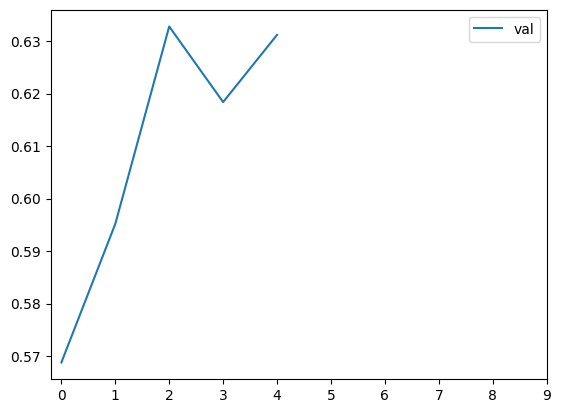

In [ ]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Adjusting the learning rate

* What's the learning rate
* Trying different values

In [ ]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(50)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
79/79 [==============================] - 49s 584ms/step - loss: 3.7612 - accuracy: 0.0841 - val_loss: 3.3465 - val_accuracy: 0.2120
Epoch 2/10
79/79 [==============================] - 44s 562ms/step - loss: 3.0708 - accuracy: 0.2902 - val_loss: 2.8072 - val_accuracy: 0.3568
Epoch 3/10
79/79 [==============================] - 44s 552ms/step - loss: 2.6094 - accuracy: 0.4145 - val_loss: 2.4453 - val_accuracy: 0.4392
Epoch 4/10
79/79 [==============================] - 44s 557ms/step - loss: 2.2928 - accuracy: 0.4918 - val_loss: 2.2026 - val_accuracy: 0.4904
Epoch 5/10
79/79 [==============================] - 43s 549ms/step - loss: 2.0704 - accuracy: 0.5374 - val_loss: 2.0315 - val_accuracy: 0.5296
Epoch 6/10
79/79 [==============================] - 44s 554ms/step - loss: 1.9054 - accuracy: 0.5677 - val_loss: 1.9085 - val_accuracy: 0.5552
Epoch 7/10
79/79 [==============================] - 43s 547ms/step - loss: 1.7795 - accuracy: 0.5967 - val_loss: 1.8134 - val_accuracy:

In [ ]:
del scores[0.1]
del scores[0.0001]

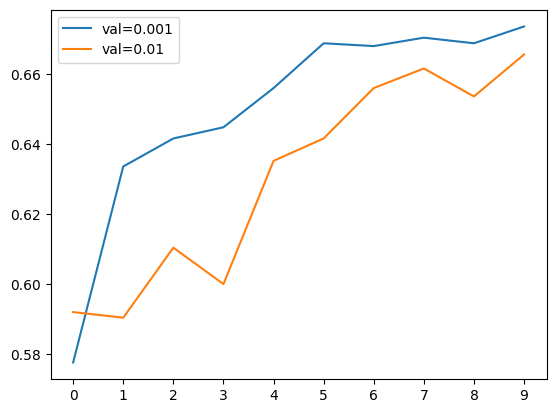

In [ ]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
learning_rate = 0.001

## Checkpointing

* Saving the best model only
* Training a model with callbacks

In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

In [ ]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=15,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/15
79/79 [==============================] - ETA: 0s - loss: 2.4112 - accuracy: 0.4097

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/79 [==============================] - 48s 559ms/step - loss: 2.4112 - accuracy: 0.4097 - val_loss: 1.6179 - val_accuracy: 0.5816
Epoch 2/15
79/79 [==============================] - 44s 561ms/step - loss: 1.3805 - accuracy: 0.6435 - val_loss: 1.4428 - val_accuracy: 0.6072
Epoch 3/15
79/79 [==============================] - 45s 575ms/step - loss: 1.0902 - accuracy: 0.7194 - val_loss: 1.3363 - val_accuracy: 0.6480
Epoch 4/15
79/79 [==============================] - 45s 574ms/step - loss: 0.9172 - accuracy: 0.7616 - val_loss: 1.2909 - val_accuracy: 0.6504
Epoch 5/15
79/79 [==============================] - 45s 577ms/step - loss: 0.7736 - accuracy: 0.8090 - val_loss: 1.2629 - val_accuracy: 0.6560
Epoch 6/15
79/79 [==============================] - 45s 573ms/step - loss: 0.6769 - accuracy: 0.8367 - val_loss: 1.2697 - val_accuracy: 0.6448
Epoch 7/15
79/79 [==============================] - 44s 563ms/step - loss: 0.5955 - accuracy: 0.8665 - val_loss: 1.2279 - val_accuracy: 0.6616
Epoch 8/15


## Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(50)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
79/79 [==============================] - 48s 561ms/step - loss: 3.7051 - accuracy: 0.0793 - val_loss: 3.4435 - val_accuracy: 0.1392
Epoch 2/10
79/79 [==============================] - 44s 553ms/step - loss: 3.2030 - accuracy: 0.1867 - val_loss: 2.9207 - val_accuracy: 0.2680
Epoch 3/10
79/79 [==============================] - 43s 545ms/step - loss: 2.6544 - accuracy: 0.3255 - val_loss: 2.4378 - val_accuracy: 0.4032
Epoch 4/10
79/79 [==============================] - 43s 544ms/step - loss: 2.2716 - accuracy: 0.4187 - val_loss: 2.2128 - val_accuracy: 0.4408
Epoch 5/10
79/79 [==============================] - 43s 540ms/step - loss: 2.0811 - accuracy: 0.4558 - val_loss: 2.1225 - val_accuracy: 0.4616
Epoch 6/10
79/79 [==============================] - 45s 570ms/step - loss: 1.9531 - accuracy: 0.4892 - val_loss: 2.0279 - val_accuracy: 0.4840
Epoch 7/10
79/79 [==============================] - 43s 542ms/step - loss: 1.8623 - accuracy: 0.5100 - val_loss: 1.9794 - val_accuracy: 0.4

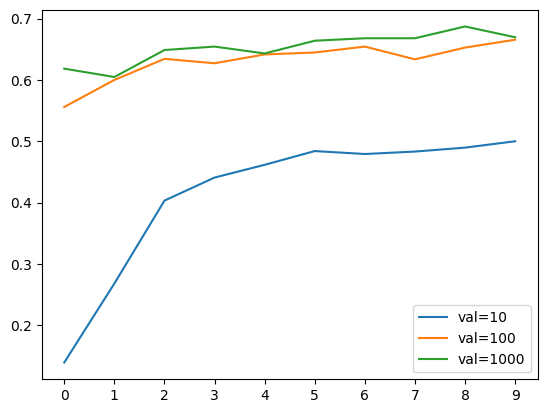

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
# plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(50)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate = 0.001
size = 1000

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/30
79/79 [==============================] - 2445s 31s/step - loss: 2.0651 - accuracy: 0.4728 - val_loss: 1.5254 - val_accuracy: 0.5744
Epoch 2/30
79/79 [==============================] - 45s 570ms/step - loss: 1.0783 - accuracy: 0.6950 - val_loss: 1.4521 - val_accuracy: 0.6160
Epoch 3/30
79/79 [==============================] - 45s 574ms/step - loss: 0.6922 - accuracy: 0.8096 - val_loss: 1.3595 - val_accuracy: 0.6352
Epoch 4/30
79/79 [==============================] - 46s 582ms/step - loss: 0.4585 - accuracy: 0.8735 - val_loss: 1.3241 - val_accuracy: 0.6512
Epoch 5/30
79/79 [==============================] - 45s 569ms/step - loss: 0.2874 - accuracy: 0.9281 - val_loss: 1.3555 - val_accuracy: 0.6544
Epoch 6/30
79/79 [==============================] - 45s 572ms/step - loss: 0.1796 - accuracy: 0.9594 - val_loss: 1.3695 - val_accuracy: 0.6632
Epoch 7/30
79/79 [==============================] - 45s 574ms/step - loss

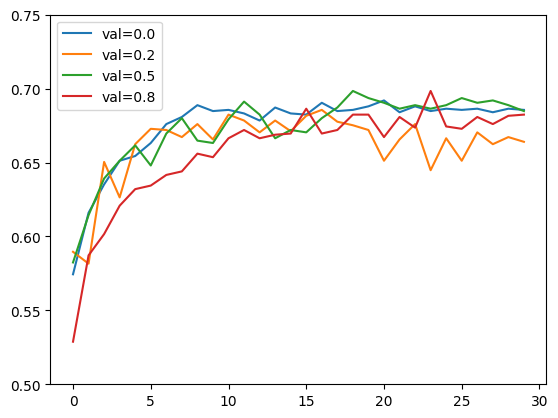

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.5, 0.75)
plt.legend()

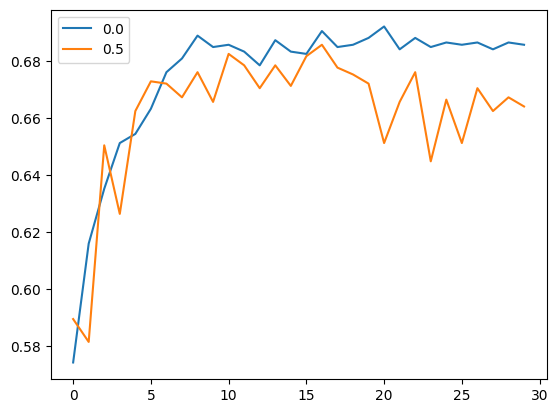

In [ ]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.5)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## Data augmentation

* Different data augmentations
* Training a model with augmentations

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './landmark_images/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './landmark_images/test',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 4996 images belonging to 50 classes.
Found 1250 images belonging to 50 classes.


In [ ]:
learning_rate = 0.001
size = 1000
droprate = 0.0

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
157/157 [==============================] - 51s 295ms/step - loss: 2.0294 - accuracy: 0.4818 - val_loss: 1.4109 - val_accuracy: 0.6224
Epoch 2/50
157/157 [==============================] - 44s 282ms/step - loss: 1.0511 - accuracy: 0.7058 - val_loss: 1.4164 - val_accuracy: 0.6176
Epoch 3/50
157/157 [==============================] - 45s 284ms/step - loss: 0.6583 - accuracy: 0.8036 - val_loss: 1.3746 - val_accuracy: 0.6464
Epoch 4/50
157/157 [==============================] - 44s 282ms/step - loss: 0.4089 - accuracy: 0.8859 - val_loss: 1.5972 - val_accuracy: 0.6392
Epoch 5/50
157/157 [==============================] - 44s 281ms/step - loss: 0.2453 - accuracy: 0.9351 - val_loss: 1.4042 - val_accuracy: 0.6552
Epoch 6/50
157/157 [==============================] - 43s 277ms/step - loss: 0.1379 - accuracy: 0.9698 - val_loss: 1.5274 - val_accuracy: 0.6528
Epoch 7/50
157/157 [==============================] - 44s 283ms/step - loss: 0.0996 - accuracy: 0.9760 - val_loss: 1.5872 - val_ac

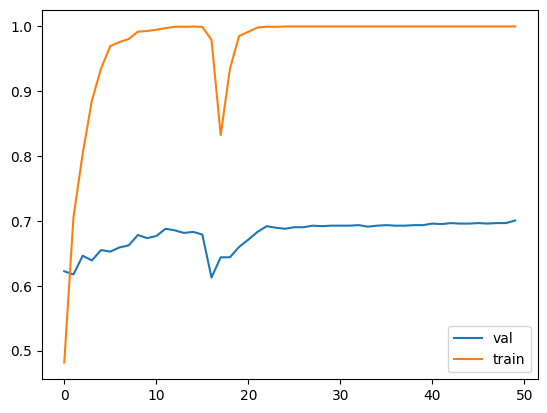

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Training a larger model

* Train a 299x299 model

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(50)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
input_size = 299

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './landmark_images/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './landmark_images/test',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 4996 images belonging to 50 classes.
Found 1250 images belonging to 50 classes.


In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.0005
size = 1000
droprate = 0.0

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
157/157 [==============================] - ETA: 0s - loss: 1.8068 - accuracy: 0.5641

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 194s 1s/step - loss: 1.8068 - accuracy: 0.5641 - val_loss: 1.0563 - val_accuracy: 0.7176
Epoch 2/50
157/157 [==============================] - 179s 1s/step - loss: 0.9300 - accuracy: 0.7464 - val_loss: 1.0093 - val_accuracy: 0.7168
Epoch 3/50
157/157 [==============================] - 184s 1s/step - loss: 0.7106 - accuracy: 0.7998 - val_loss: 0.9446 - val_accuracy: 0.7304
Epoch 4/50
157/157 [==============================] - 189s 1s/step - loss: 0.5498 - accuracy: 0.8479 - val_loss: 0.8363 - val_accuracy: 0.7656
Epoch 5/50
157/157 [==============================] - 181s 1s/step - loss: 0.4602 - accuracy: 0.8691 - val_loss: 0.9133 - val_accuracy: 0.7480
Epoch 6/50
157/157 [==============================] - 177s 1s/step - loss: 0.4012 - accuracy: 0.8821 - val_loss: 0.8402 - val_accuracy: 0.7640
Epoch 7/50
157/157 [==============================] - 186s 1s/step - loss: 0.3310 - accuracy: 0.9021 - val_loss: 0.8586 - val_accuracy: 0.7704
Epoch 8/50

KeyboardInterrupt: 

## Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [6]:
model = keras.models.load_model('xception_v4_1_15_0.794.h5')

In [ ]:
path = './landmark_images/train/45.Temple_of_Heaven/1002261bca5e54cb.jpg'

In [ ]:
img = load_img(path, target_size=(299, 299))

In [ ]:
import numpy as np

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [25]:
classes = ['00.Haleakala_National_Park',
 '01.Mount_Rainier_National_Park',
 '02.Ljubljana_Castle',
 '03.Dead_Sea',
 '04.Wroclaws_Dwarves',
 '05.London_Olympic_Stadium',
 '06.Niagara_Falls',
 '07.Stonehenge',
 '08.Grand_Canyon',
 '09.Golden_Gate_Bridge',
 '10.Edinburgh_Castle',
 '11.Mount_Rushmore_National_Memorial',
 '12.Kantanagar_Temple',
 '13.Yellowstone_National_Park',
 '14.Terminal_Tower',
 '15.Central_Park',
 '16.Eiffel_Tower',
 '17.Changdeokgung',
 '18.Delicate_Arch',
 '19.Vienna_City_Hall',
 '20.Matterhorn',
 '21.Taj_Mahal',
 '22.Moscow_Raceway',
 '23.Externsteine',
 '24.Soreq_Cave',
 '25.Banff_National_Park',
 '26.Pont_du_Gard',
 '27.Seattle_Japanese_Garden',
 '28.Sydney_Harbour_Bridge',
 '29.Petronas_Towers',
 '30.Brooklyn_Bridge',
 '31.Washington_Monument',
 '32.Hanging_Temple',
 '33.Sydney_Opera_House',
 '34.Great_Barrier_Reef',
 '35.Monumento_a_la_Revolucion',
 '36.Badlands_National_Park',
 '37.Atomium',
 '38.Forth_Bridge',
 '39.Gateway_of_India',
 '40.Stockholm_City_Hall',
 '41.Machu_Picchu',
 '42.Death_Valley_National_Park',
 '43.Gullfoss_Falls',
 '44.Trevi_Fountain',
 '45.Temple_of_Heaven',
 '46.Great_Wall_of_China',
 '47.Prague_Astronomical_Clock',
 '48.Whitby_Abbey',
 '49.Temple_of_Olympian_Zeus']


In [ ]:
dict(zip(classes, pred[0]))

{'00.Haleakala_National_Park': -10.457101,
 '01.Mount_Rainier_National_Park': -5.3160915,
 '02.Ljubljana_Castle': -5.0126667,
 '03.Dead_Sea': -7.523215,
 '04.Wroclaws_Dwarves': -0.34481183,
 '05.London_Olympic_Stadium': -7.510037,
 '06.Niagara_Falls': -6.2249784,
 '07.Stonehenge': -3.5558708,
 '08.Grand_Canyon': -4.941829,
 '09.Golden_Gate_Bridge': -11.955253,
 '10.Edinburgh_Castle': -9.570342,
 '11.Mount_Rushmore_National_Memorial': 2.166339,
 '12.Kantanagar_Temple': -6.5077295,
 '13.Yellowstone_National_Park': -0.70616436,
 '14.Terminal_Tower': -6.9451284,
 '15.Central_Park': -3.7830868,
 '16.Eiffel_Tower': -6.557604,
 '17.Changdeokgung': -1.997684,
 '18.Delicate_Arch': -9.742859,
 '19.Vienna_City_Hall': -2.29017,
 '20.Matterhorn': -12.860419,
 '21.Taj_Mahal': -7.3171415,
 '22.Moscow_Raceway': -7.3895874,
 '23.Externsteine': -5.504505,
 '24.Soreq_Cave': -5.2367516,
 '25.Banff_National_Park': -7.1702714,
 '26.Pont_du_Gard': -4.0243926,
 '27.Seattle_Japanese_Garden': -9.8361225,
 '28.S

## Convert Keras to TF-Lite

In [8]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('landmark-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

In [ ]:
!ls -lh

In [11]:
!pip install keras-image-helper

In [13]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime

Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.6 MB/s eta 0:00:00


In [14]:
# import tensorflow.lite as tflite
# #import tensorflow.lite as tflite
import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

In [15]:
interpreter = tflite.Interpreter(model_path='landmark-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [16]:
preprocessor = create_preprocessor('xception', target_size=(299, 299))

In [22]:
url = "https://drive.google.com/uc?export=download&id=1HlsdKnbseV55R9qajoit5EJa4g6gibrR"

X = preprocessor.from_url(url)

In [23]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [26]:
# "https://drive.google.com/uc?export=download&id=1Cf85feJUfxy6fHCqUgNE5qYS2LzsmicJ"
# "https://drive.google.com/uc?export=download&id=1GGWzMpCGEa1aRBuruQloIWMuIVv9pOZ4"
# "https://drive.google.com/uc?export=download&id=1HlsdKnbseV55R9qajoit5EJa4g6gibrR"
# "https://drive.google.com/uc?export=download&id=1ScrbMqZqXG22t6Qf2sOstVgIOZP_rcyZ"
dict(zip(classes, preds[0]))

{'00.Haleakala_National_Park': -8.437686,
 '01.Mount_Rainier_National_Park': -6.1109347,
 '02.Ljubljana_Castle': -3.8515563,
 '03.Dead_Sea': -7.0840516,
 '04.Wroclaws_Dwarves': -8.910318,
 '05.London_Olympic_Stadium': -0.39469862,
 '06.Niagara_Falls': -3.3051517,
 '07.Stonehenge': -6.3097315,
 '08.Grand_Canyon': -6.65258,
 '09.Golden_Gate_Bridge': -10.129052,
 '10.Edinburgh_Castle': -7.105512,
 '11.Mount_Rushmore_National_Memorial': -4.625295,
 '12.Kantanagar_Temple': -2.6491551,
 '13.Yellowstone_National_Park': -4.302975,
 '14.Terminal_Tower': -0.45401296,
 '15.Central_Park': -3.3533576,
 '16.Eiffel_Tower': 6.9643555,
 '17.Changdeokgung': -2.2712102,
 '18.Delicate_Arch': -5.485529,
 '19.Vienna_City_Hall': 0.012800902,
 '20.Matterhorn': -8.118496,
 '21.Taj_Mahal': -5.346227,
 '22.Moscow_Raceway': -3.7226713,
 '23.Externsteine': -7.3107414,
 '24.Soreq_Cave': -3.6042366,
 '25.Banff_National_Park': -5.3279915,
 '26.Pont_du_Gard': -4.8959427,
 '27.Seattle_Japanese_Garden': -10.410651,
 '28